In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [3]:
import sklearn.datasets as datasets

In [4]:
diabetes = datasets.load_diabetes()

In [15]:

feature_names = diabetes.feature_names
target = diabetes.target
data = DataFrame(diabetes.data)
data.columns = feature_names

In [18]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [21]:
linear = LinearRegression()

In [22]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_ = linear.predict(X_test)

In [25]:
linear.score(X_test, y_test)

0.43843604017332716

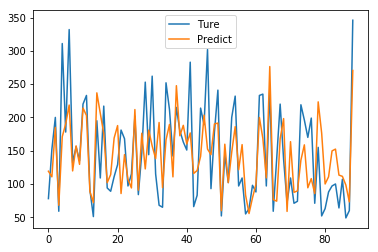

In [35]:
plt.plot(y_test, label="Ture")
plt.plot(y_, label="Predict")
plt.legend()

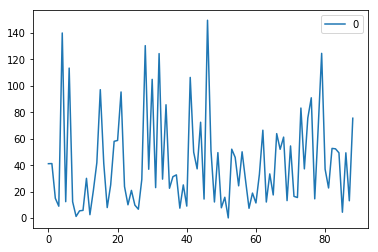

In [45]:
d = ((y_ - y_test) ** 2) ** 0.5
DataFrame(d).plot()

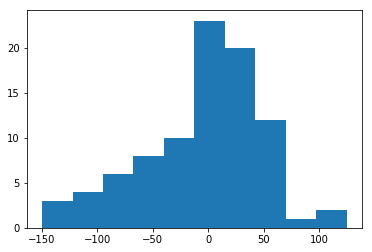

In [48]:
# 残差直方图，查看误差的分布情况
s = plt.hist(y_-y_test)

In [50]:
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [62]:
# 研究的对象
# 对对象可能产生的影响的因素是什么
from sklearn.neighbors import KNeighborsRegressor

target1 = target
train1 = data["s1"].copy().values.reshape(-1,1)

In [63]:
linear1 = LinearRegression()
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    train1, target1, random_state=1)

In [70]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

linear1.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
l_y_ = linear1.predict(X_test1)
knn_y_ = knn.predict(X_test1)

ValueError: query data dimension must match training data dimension